In [211]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library
import scipy as sp

import re
import typing

In [212]:
df = pd.read_csv('virus_hw2.csv')

In [213]:
df.head()

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3,"1439 Mason Spring Suite 287\nWest Marissa, VT ...",3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,4,"621 Johnny Plain Apt. 687\nAmyton, MA 61425",2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk


In [214]:
df.drop(columns=['PatientID', 'Address']) #utterly meaningless to disease diagnosis

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,BloodType,CurrentLocation,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,NaN,NaN,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,NaN,"(Decimal('68.4111015'), Decimal('-120.794703'))",...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,NaN,"(Decimal('-27.055268'), Decimal('-45.220383'))",...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,AB+,"(Decimal('66.539494'), Decimal('10.495389'))",...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,O+,"(Decimal('-43.228750'), Decimal('14.144745'))",...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk
5,3.0,683.970293,1382.886580,546.525870,NaN,NaN,NaN,31.188945,A-,"(Decimal('64.7080195'), Decimal('4.581880'))",...,1.190291,0.033276,-1.018127,NaN,-0.602338,NaN,-0.339152,NaN,-0.327741,flue_Spreader_atRisk
6,3.0,266.522969,556.768471,NaN,NaN,NaN,NaN,NaN,O+,NaN,...,1.134836,-0.328752,-0.539993,1.000227,0.206121,-1.091816,-1.227989,-1.844853,-0.838332,covid_NotSpreader_atRisk
7,NaN,365.918734,NaN,1152.419923,84.186382,NaN,NaN,NaN,B+,"(Decimal('-83.2593835'), Decimal('171.015674'))",...,2.607946,0.957410,-1.899584,-0.119899,0.022994,NaN,NaN,-0.881802,1.379979,not_detected_Spreader_atRisk
8,NaN,NaN,1707.612827,1158.514542,64.697469,NaN,NaN,29.089820,B+,"(Decimal('31.0664705'), Decimal('15.264753'))",...,1.014724,0.485880,NaN,NaN,-0.817978,-1.020924,NaN,-1.751272,0.997292,not_detected_Spreader_NotatRisk
9,6.0,699.158842,1385.877845,1355.093533,NaN,NaN,NaN,32.077841,NaN,"(Decimal('26.8546335'), Decimal('-60.182060'))",...,NaN,0.137833,NaN,NaN,-0.551349,NaN,-0.849444,0.287530,2.933652,cold_NotSpreader_atRisk


In [215]:
x = df.CurrentLocation
x = x.fillna("(Decimal('-67.5342235'), Decimal('147.951103'))")
li = x.tolist()
len(li)

5000

In [216]:
reg='-?\d+\.?\d*'
match="(Decimal('21.434580'), Decimal('-103.928014'))"
re.findall(reg, match)

['21.434580', '-103.928014']

In [217]:
regex = '-?\d+\.?\d*'           

loc = [ [ re.findall(regex, match)[0], re.findall(regex, match)[1]]
                                                for match in li ]


for item in loc:
    item[0]=float(item[0])
    item[1]=float(item[1])
    
locx = np.array([match[0] for match in loc])
locy = np.array([match[1] for match in loc])
locx

array([-67.5342235,  68.4111015, -27.055268 , ..., -68.6266485,
       -67.5342235,  67.0047005])

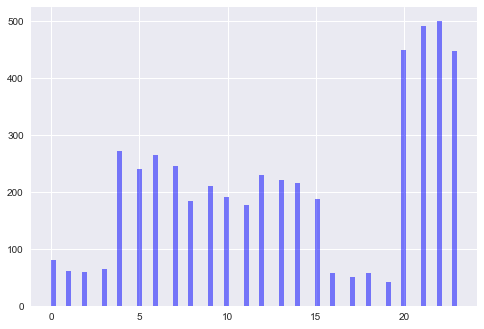

In [218]:
#test result matching with colors on graph
df2 = df
df2['TestResultsCode']=df2['TestResultsCode'].astype('category')
tr=np.array(df2.TestResultsCode.cat.codes)
num_bins = 80
fig, ax = plt.subplots()
n, bins, patches = plt.hist(tr, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [219]:
cat = pd.Categorical(df.TestResultsCode)
cat

[flue_Spreader_NotatRisk, measles_NotSpreader_NotatRisk, not_detected_NotSpreader_atRisk, covid_Spreader_NotatRisk, covid_Spreader_NotatRisk, ..., not_detected_Spreader_atRisk, not_detected_Spreader_atRisk, not_detected_Spreader_atRisk, cold_NotSpreader_atRisk, flue_NotSpreader_atRisk]
Length: 5000
Categories (24, object): [cmv_NotSpreader_NotatRisk, cmv_NotSpreader_atRisk, cmv_Spreader_NotatRisk, cmv_Spreader_atRisk, ..., not_detected_NotSpreader_NotatRisk, not_detected_NotSpreader_atRisk, not_detected_Spreader_NotatRisk, not_detected_Spreader_atRisk]

In [220]:
len(np.bincount(tr))

24

In [221]:
# Fixing random state for reproducibility
#np.random.seed(19680801)

# some random data
#x = np.random.randn(1000)
#y = np.random.randn(1000)


def scatter_hist(x, y, color, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y,c=color)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(15, 15))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(locx, locy, tr, ax, ax_histx, ax_histy)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook



close = 15151 * np.array(tr)^2

fig, ax = plt.subplots()
ax.scatter(np.array(locx), np.array(locy), c=close,  alpha=0.5)


ax.set_title('location')

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
print("variance is {}".format(locx.var()))
print("mean is {}".format(locx.mean()))
print("meadian is {}".format(np.median(locx)))

In [ ]:
bmi = np.array(df.BMI.fillna(np.nanmedian(df.BMI)).tolist()) 
np.amax(bmi)

In [ ]:
bmi[bmi>45]=45
bmi

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(np.sort(bmi)))

In [ ]:
plt.show()

In [108]:
print("variance is {}".format(bmi.var())) #looks like symmetric distribution with average 30 and cutoff accurate from that symmetry
print("mean is {}".format(bmi.mean()))
print("meadian is {}".format(np.median(bmi)))

variance is 15.583658012797805
mean is 29.159395510734768
meadian is 29.050446719385697


In [109]:
df['BloodType']=df['BloodType'].astype('category')
bt=np.array(df.BloodType.cat.codes)
bt=bt[bt != -1]
print(np.histogram(bt))
bt

(array([513, 498, 509,   0, 534, 479,   0, 495, 468, 492], dtype=int64), array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]))


array([2, 6, 1, ..., 7, 4, 4], dtype=int8)

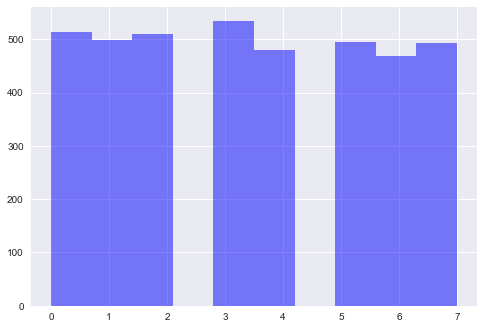

In [110]:
num_bins = 10
n, bins, patches = plt.hist(np.array(bt), num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [111]:
#remove all nan
a = np.array(df.SyndromeClass.fillna(-1))
a

array([ 2.,  3.,  1., ..., -1.,  1., -1.])

In [112]:
tr = np.array(tr)
len(tr)

5000

In [113]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

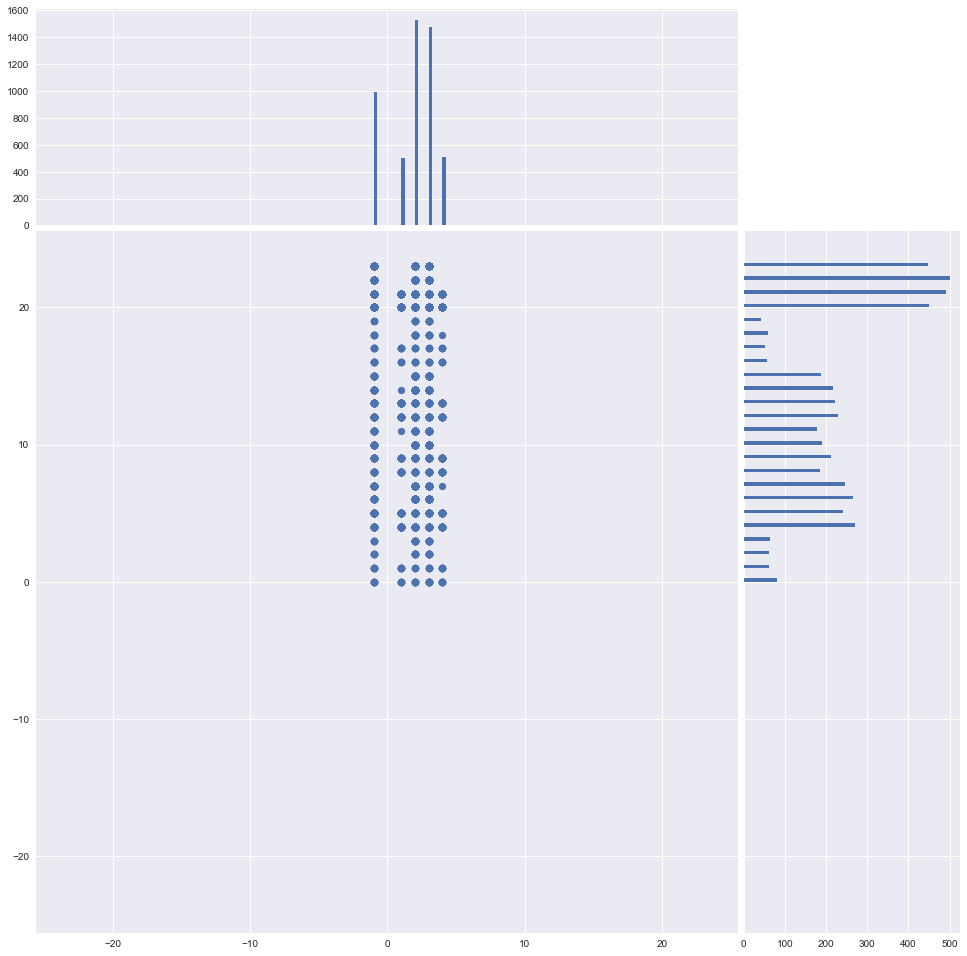

In [114]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(15, 15))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(np.array(a), np.array(tr),  ax, ax_histx, ax_histy)

plt.show()

## On graph we see that absence of symptom categories 1 and 4 indicates the person is not spreading pretty much completely accurately

## contrast pca with scaled/non-scaled pcr results

In [140]:
#standardizing pcr results - works!
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_scalar = pd.DataFrame(data=None, columns= pcr_result  )


for item in range(1,17):
    df_scalar['pcrResult{}'.format(str(np.int(item)))] = df['pcrResult{}'.format(str(np.int(item)))].fillna( 0 ) #switch to avg
    data = np.array( df_scalar['pcrResult{}'.format(str(np.int(item)))].tolist() )
    data = data.reshape(-1,1)
    data = scalar.fit_transform(data)
    data = np.array(data.reshape(1,-1))
    data= np.array([ i for i in data[0] ])
    df_scalar['pcrResult{}'.format(str(np.int(item)))] = pd.Series(  np.array(data) )
    
df_scalar


,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
0,-0.990006,-1.055587,1.515032,0.606045,0.022767,-0.945994,-1.513602,-0.632208,-1.530719,0.180695,-1.610600,-1.533626,-0.660605,0.238487,-1.222962,0.066101
1,-0.477081,-1.536260,1.515032,-0.439243,-0.677113,-0.808928,-0.645127,-0.629431,-1.530796,-0.498535,-0.945526,-1.534111,-0.323926,0.009598,-0.009759,-1.974280
2,0.428820,0.515740,-0.082766,-1.262091,0.583338,1.517310,-0.451952,1.614278,1.046311,-1.514671,1.442530,1.033690,0.367178,0.345800,-0.009759,0.135445
3,-1.518260,0.464561,0.300697,0.259372,0.583338,0.753340,-1.198124,1.116288,-0.538569,-1.514665,-0.323623,-1.013404,-1.181418,-2.001352,0.351898,0.859482
4,-1.135842,-1.536258,0.300697,1.469440,0.504368,0.916899,1.522187,0.638958,-1.577799,0.180695,-0.011603,-1.533696,0.646681,0.552327,1.505935,0.042669
5,0.146478,-0.039197,0.703625,1.469440,-1.103864,-0.006471,-0.293953,0.005377,-1.077509,-0.954491,0.768065,-0.008518,-0.775374,0.245683,0.876055,0.333864
6,0.146478,-0.648120,1.270093,0.844164,0.476877,-1.530262,-1.513595,-1.521718,-1.530708,-0.453804,-1.523998,-1.008776,0.372882,0.366218,-0.009759,0.310505
7,0.146478,1.521075,-0.026510,-0.207121,0.071499,-0.006471,0.178031,-0.902372,0.842536,0.180695,-1.247309,-0.008518,-0.737689,-2.001352,-1.242082,0.857011
8,-1.062371,0.758476,-0.026510,-0.207121,-1.488662,-1.530255,0.178031,-1.516905,0.559421,0.180695,-1.523990,1.239233,1.056001,0.503623,-1.525481,0.257550
9,0.974304,0.153906,-0.026510,-0.207121,-1.039437,-0.006471,-0.730126,0.500588,1.535233,-0.853422,-0.587249,0.953060,1.293279,0.902820,-0.552299,-1.974280


In [139]:
#quantile transformer- works!
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
qt = QuantileTransformer(n_quantiles=1000, random_state=0, output_distribution = 'normal')

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_qt = pd.DataFrame(data = None, columns= pcr_result  )


for item in range(1,17):
    df_qt['pcrResult{}'.format(str(np.int(item)))] = df['pcrResult{}'.format(str(np.int(item)))].fillna( 0 ) #switch to avg
    data = np.array( df_qt['pcrResult{}'.format(str(np.int(item)))].tolist() )
    data = data.reshape(-1,1)
    data = qt.fit_transform(data) 
    data = np.array(data.reshape(1,-1))
    data= np.array([ i for i in data[0] ])
    df_qt['pcrResult{}'.format(str(np.int(item)))] = pd.Series(  np.array(data) )
    
df_qt


,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
0,-0.831116,-0.902141,1.805806,0.515018,0.010469,-0.755524,-1.483368,-0.519319,-1.606622,-0.033880,-2.989327,-1.281709,-0.510877,-0.230145,-0.994365,-0.663105
1,-0.395299,-1.509560,1.805806,-0.351453,-0.566162,-0.652978,-0.518073,-0.516791,-1.871991,-0.404406,-0.754593,-1.838188,-0.209787,-0.749394,-0.012546,-5.199338
2,0.352610,0.419466,-0.068635,-1.088938,0.478025,2.234148,-0.349372,2.437556,0.873327,-1.619879,1.173581,0.854898,0.271232,-0.009345,-0.012546,-0.500679
3,-1.369399,0.376327,0.236781,0.213798,0.478025,0.609560,-0.988221,0.949918,-0.291367,-1.457174,-0.280816,-0.830363,-1.007519,-5.199338,0.304686,1.153478
4,-0.956827,-1.411107,0.236781,1.204935,0.404946,0.739854,1.286277,0.515023,-3.091547,0.165095,-0.022584,-1.728371,0.521301,0.449459,1.437115,-0.714502
5,0.122883,-0.028608,0.573346,1.204935,-0.950699,-0.015055,-0.208367,0.013801,-0.909604,-0.771297,0.635320,-0.022584,-0.620509,-0.212572,0.687793,-0.033760
6,0.122883,-0.534014,1.061543,0.709161,0.382545,-1.769422,-1.251762,-1.556468,-1.225942,-0.368235,-1.858782,-0.823994,0.275448,0.037968,-0.012546,-0.082634
7,0.122883,1.398456,-0.031369,-0.165018,0.053902,-0.015055,0.146048,-0.741365,0.676852,0.177827,-1.019213,-0.022584,-0.587753,-5.199338,-1.015013,1.146565
8,-0.890133,0.611041,-0.031369,-0.165018,-1.216633,-1.647592,0.146048,-1.470119,0.446213,0.177827,-1.671209,1.035695,0.873138,0.331474,-1.675026,-0.209625
9,0.798642,0.131940,-0.031369,-0.165018,-0.891740,-0.015055,-0.585605,0.409273,1.625298,-0.689481,-0.467418,0.774255,1.116423,1.272833,-0.435628,-5.199338


# Visualization

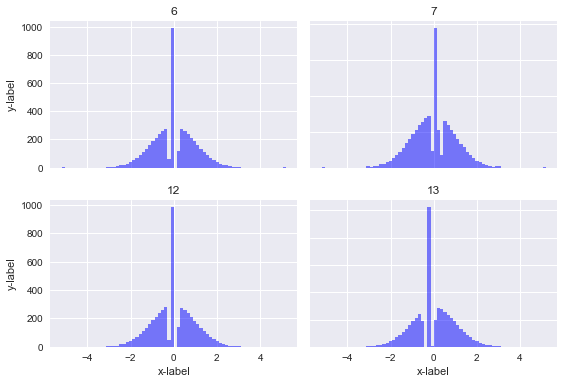

In [158]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_qt.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_qt.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_qt.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_qt.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

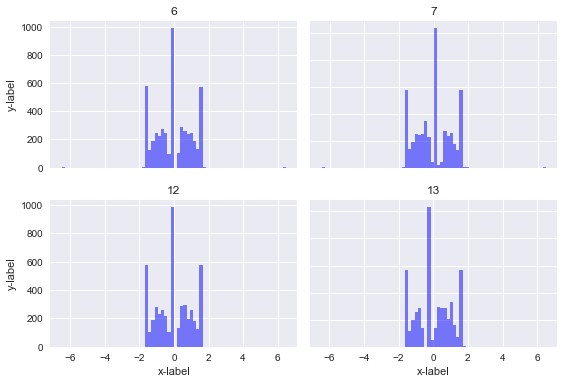

In [159]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_scalar.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_scalar.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_scalar.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_scalar.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

# Filter Method 1 - PCA
## Rescaled PCR results with mean 0 and variance 1, so that PCA will work properly. Otherwise if a feature takes improportional values in contrast to other feaures then the PCA will overweigh the covariance of that feature with others.

In [161]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit_transform(df_scalar) #plug in scaled values ( with outliers )

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.20468755 0.14411374 0.11409749 0.10389093 0.07474188]
[127.96485488 107.37364374  95.53951709  91.16618921  77.32626088]


In [162]:
pca.get_covariance()

array([[ 7.29355565e-01, -3.67045176e-02, -1.79148222e-01,
         5.18627043e-02,  7.66060271e-02, -5.87177803e-03,
        -4.08567039e-03, -1.98244759e-03,  2.43890089e-01,
         1.07721677e-03, -6.65609335e-03,  2.51658009e-01,
         3.04298818e-01,  9.92789929e-02, -6.07268235e-03,
        -4.35705239e-02],
       [-3.67045176e-02,  1.03987507e+00,  2.33661618e-02,
        -2.72431667e-01, -1.69494133e-01,  1.25305182e-02,
        -5.58921489e-03,  1.86498382e-02,  3.56650720e-01,
        -5.04141166e-03,  9.05624589e-03,  3.28741598e-01,
        -2.05295544e-01, -1.12253324e-01,  1.44556486e-02,
         7.19862194e-02],
       [-1.79148222e-01,  2.33661618e-02,  9.90201985e-01,
         7.35134077e-02,  2.39229473e-01, -1.39671180e-02,
         1.27464133e-02, -1.16488989e-02, -2.63726420e-01,
         1.33870686e-02, -6.21598088e-03, -1.77135854e-01,
        -3.09787292e-01, -2.21996710e-01, -9.68341808e-03,
         1.17924892e-01],
       [ 5.18627043e-02, -2.72431667e

In [164]:
V = pca.components_
V

array([[ 4.06677600e-04, -1.42298114e-02,  1.04282995e-02,
         7.52897475e-03,  5.67024307e-03, -4.59506406e-01,
        -3.39346716e-01, -3.75236645e-01, -1.77536089e-02,
        -1.64692732e-01, -5.02092472e-01, -9.64509145e-03,
        -7.00872308e-03, -2.21277177e-03, -5.02728704e-01,
         8.71533234e-03],
       [-2.65353144e-01, -2.60798606e-01,  3.38507384e-01,
         1.31360275e-01,  9.66391903e-02,  2.07217222e-02,
         2.05198163e-03,  1.76974472e-02, -5.68227309e-01,
        -1.51089107e-02,  1.28210052e-02, -5.31326453e-01,
        -3.13912030e-01, -1.15963967e-01,  1.17660559e-02,
         4.39717642e-02],
       [-8.83142733e-03,  4.42250650e-02, -4.23840057e-02,
        -1.28888161e-02, -7.84212847e-02,  2.90060347e-01,
        -5.12361858e-01,  4.55800500e-01,  3.81656046e-03,
        -6.54882877e-01, -7.25715339e-02, -1.27828066e-02,
        -2.17126668e-02,  6.43148634e-03,  2.46399121e-02,
        -3.72103710e-03],
       [ 2.47903834e-01, -5.85340364e

 ## The Principal Components of the matrix are the vectors where the variance of the values of squared distances from the data to any normalized vector takes its maximal value. 
 ## This implies that the maximal coefficients of each Principal Component indicate the largest covariance among the respective features 
 ## Above, we got 5 principal components, next we will determine the largest coefficents (in absolute value) in each of the Principal Component, in accordance with some relevant threshold value, which is determined by the values of the coefficients in the particular principal component.

In [181]:
#sort arrays

cov = np.zeros( (5,3) )
for i in range(5):
    sort = np.sort( np.absolute(V[i]) )
    for j in range(3):
        cov[i][j]=sort[15-j]


In [182]:
cov

array([[0.5027287 , 0.50209247, 0.45950641],
       [0.56822731, 0.53132645, 0.33850738],
       [0.65488288, 0.51236186, 0.4558005 ],
       [0.58534036, 0.52892299, 0.3299686 ],
       [0.65196481, 0.53917806, 0.3182113 ]])

In [210]:
#matrix of indices

cov_idx = np.zeros( (5,3) )

for i in range(5):
    where =  [ (idx+1)  for idx, item in enumerate(V[i]) if np.absolute(item) >= cov[i][2] ] #  indices of 3 maximal coefficients
    print(len(where)
    for j in range(3):
        cov_idx[i][j] = where[j]
cov_idx

SyntaxError: invalid syntax (<ipython-input-210-78f9ae3fcf8c>, line 6)

## Validate results using pearson correlation